<a href="https://colab.research.google.com/github/Vonewman/fastai_courses/blob/main/introduction_to_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x): return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.162249,0.019747,0.007442,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.054799,0.013124,0.005413,00:54


## Tester le modèle entrainé

In [ ]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
# Charger un exemple de test
img = PILImage.create(uploader.data[0])

# Utiliser le modèle pour prédire un résultat
is_cat_pred,_,probs = learn.predict(img)

# Afficher le résultat
print(f"Is this a cat?: {is_cat_pred}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


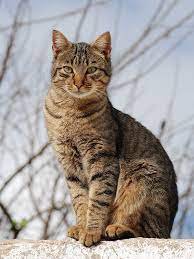

In [ ]:
img

## Examiner les données en entrée et en sortie

In [ ]:
files = get_image_files(path)
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_8.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_34.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_108.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_29.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_135.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_54.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_179.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_3.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_108.jpg')...]

In [ ]:
is_cat(files[0].name),is_cat(files[2].name)

(False, False)

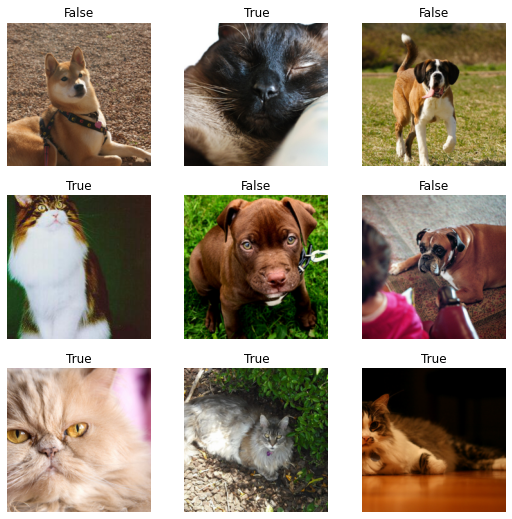

In [ ]:
dls.show_batch()

In [ ]:
learn.predict(img)

('True', TensorBase(1), TensorBase([1.4828e-10, 1.0000e+00]))

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.798078,2.276714,00:01


epoch,train_loss,valid_loss,time
0,1.879414,1.450694,00:01
1,1.592171,1.045704,00:01
2,1.505932,1.326079,00:01
3,1.404636,0.961580,00:01
4,1.280329,0.841080,00:01
5,1.165861,0.764491,00:01
6,1.073176,0.728308,00:01
7,1.000234,0.729092,00:01


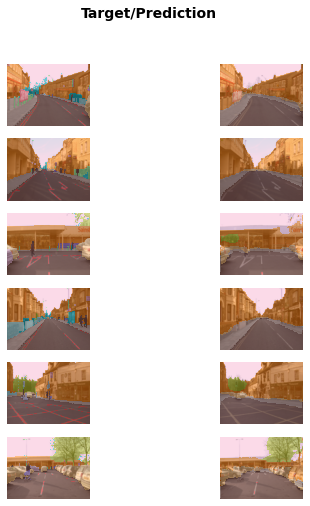

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

## Langage naturel (NLP) : Analyse de sentiment sur les critiques de films

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.464027,0.410661,0.815440,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.309859,0.237393,0.904520,07:08
1,0.248789,0.204560,0.920080,07:09
2,0.185158,0.188738,0.927120,07:08
3,0.154432,0.194859,0.927440,07:07


In [ ]:
learn.predict("I really liked that movie!")